In [2]:
import sys
import xml.etree.ElementTree as ET
from mxnet import image  
from skimage import io  
import os  

In [3]:
from mxnet import gluon

In [4]:
#import pandas as pd  #No module named 'pandas'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from numpy import *

In [4]:
lena = mpimg.imread('n02802426_5666.JPEG')

In [5]:
lena.shape

(500, 333, 3)

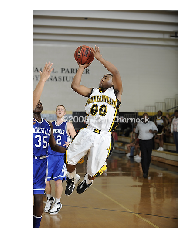

In [7]:
plt.imshow(lena)
plt.axis('off')
plt.show()           

In [16]:
directory='./pic_select/'
if not os.path.exists(directory):  
        os.makedirs(directory)
img_name='1_1.JPEG'

In [17]:
import shutil

# 图片的路径

In [18]:
directory + img_name

'./pic_select/1_1.JPEG'

In [24]:
o_pic_name='n02802426_5666'

In [28]:
print('./JPEGImages/'+o_pic_name+'.JPEG')

./JPEGImages/n02802426_5666.JPEG


In [29]:
oldname='./JPEGImages/'+o_pic_name+'.JPEG'
newname=directory + img_name
shutil.copyfile(oldname,newname)#复制图片

'./pic_select/1_1.JPEG'

# 另一种读图片的方式

In [13]:
 with open(o_pic_name, 'rb') as f:  
                img = image.imdecode(f.read())

In [14]:
io.imsave(directory + img_name, img.asnumpy())

# 生成所需的ｌｉｓｔ文件　并将图片拷贝到新文件

In [2]:
import sys
import xml.etree.ElementTree as ET
from mxnet import image  
from skimage import io  
import os 
import shutil

In [4]:
#fileName='./label_id.txt'
fileName='./val.txt'#存放者
fileName2='./Annotations/'#xml 存放文件夹
#pic_sel_dir='./pic_select/'
pic_sel_dir='./pic_select_val/'
if not os.path.exists(pic_sel_dir):  
        os.makedirs(pic_sel_dir)
        
#fp=open(fileName,'r')
with open(fileName,'r') as fp:
    #lines=fp.readlines()
    i=0
    for line in fp:
        
        #fp1 = open('./test2.txt','a')
        #line=fp.readline()
        line=line.rstrip()#去除后面的换行符
        xml_dir=fileName2+line+'.xml'
        #print(xml_dir)
        
        #将图片复制到新文件夹
        oldname='./JPEGImages/'+line+'.JPEG'#需要拷贝的文件的路径和文件名
        newname=pic_sel_dir+str(i)+'.jpg'#新路径＋新文件名
        shutil.copyfile(oldname,newname)#复制图片
        
        tree = ET.ElementTree(file=xml_dir)#打开xml_dir
        p_label=tree.getroot()#获取根目录
        #print(p_label)#显示根目录
        #for _i in range(4):
            #print(p_label[5][4][_i].text)#打印bbox
        #打开.lst 文件
        with open('./dataset_val.lst', 'a') as f:
            width=(float)(p_label[3][0].text)
            height=(float)(p_label[3][1].text)
            x_min=(float)(p_label[5][4][0].text)/width
            y_min=(float)(p_label[5][4][1].text)/height
            x_max=(float)(p_label[5][4][2].text)/width
            y_max=(float)(p_label[5][4][3].text)/height
            f.write(  
            str(i) + '\t' +  
            # idx  
            str(4) + '\t' + str(5) + '\t' +  
            # width of header and width of each object.  
            str(width) + '\t' + str(height) + '\t' +  
            # (width, height)  
            str(0) + '\t' +  
            # class  
            str(x_min) + '\t' + str(y_min) + '\t' + str(x_max) + '\t' +str(y_max) + '\t' +  
            # xmin, ymin, xmax, ymax  
           str(i) + '.jpg\n'
            )
        i=i+1#行标号
        #fp1.write(line)
        #fp1.close()
        #if(line=='n02802426_100\n'):
            #print('n02802426_100')
            #fp1 = open('./test2.txt','a')
            #fp1.write('n02802426_100\n')
            #fp1.close
#fp.close()
print(i)

174


# 使用rec文件读取图片以及标签

In [1]:
import mxnet as mx  
import mxnet.ndarray as nd
from mxnet import image
from skimage import io  
import numpy as np

In [24]:
train_iter = mx.image.ImageDetIter(  
    batch_size=3, 
    data_shape=(3, 256, 256),  
    path_imgrec='dataset.rec',  
    path_imgidx='dataset.idx',#idx是额外生成的
    shuffle=True,
    #mean=True,
    rand_crop=1,  
    min_object_covered=0.95,  
    max_attempts=200 
)  # you can aug your data in ImageDetIter

In [25]:
train_data=train_iter

In [26]:
batch = train_data.next()
print(batch)
print((batch.data[0][0:1]).shape)
print(batch.data[0].shape)
print(batch.label[0].shape)
print(batch.label[0][0:3].shape)
print(batch.label[0][0:3])

DataBatch: data shapes: [(3, 3, 256, 256)] label shapes: [(3, 1, 5)]
(1, 3, 256, 256)
(3, 3, 256, 256)
(3, 1, 5)
(3, 1, 5)

[[[ 1.          0.20866141  0.          0.42519686  0.2451923 ]]

 [[ 1.          0.21951221  0.72961372  0.37630662  0.92274678]]

 [[ 1.          0.36482087  0.3775934   0.59283388  0.68049788]]]
<NDArray 3x1x5 @cpu(0)>


In [27]:
train_iter.reset()
for batch_2 in train_iter:  
    x = batch_2.data[0]  
    y = batch_2.label[0]  
    break 
print(y[0]) 


[[ 1.          0.26923075  0.64999992  0.55288464  0.97222209]]
<NDArray 1x5 @cpu(0)>


(3, 256, 256, 3)
(3, 3, 256, 256)


/home/qy/software/anaconda3/envs/mxnet/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


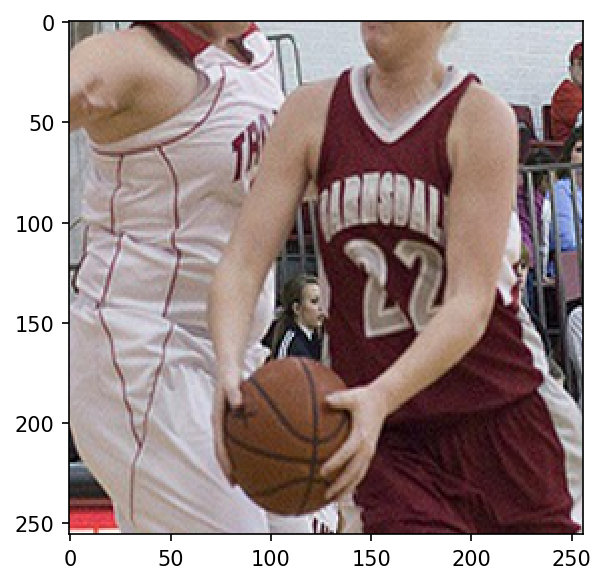

In [28]:
img =nd.transpose(x,(0,2,3,1))  
print(img.shape)
print(x.shape)
io.imshow(img[0].asnumpy().astype(np.uint8))  
io.show()

In [34]:
#print(x[0][0][0:2])#展示图片未减去均值的部分数据

In [29]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150#设置图片的显示大小
import matplotlib.pyplot as plt

In [30]:
def box_to_rect(box, color, linewidth=3):
    """convert an anchor box to a matplotlib rectangle"""
    box = box.asnumpy()
    return plt.Rectangle(
        (box[0], box[1]), box[2]-box[0], box[3]-box[1],
        fill=False, edgecolor=color, linewidth=linewidth)

In [31]:
data_shape=256

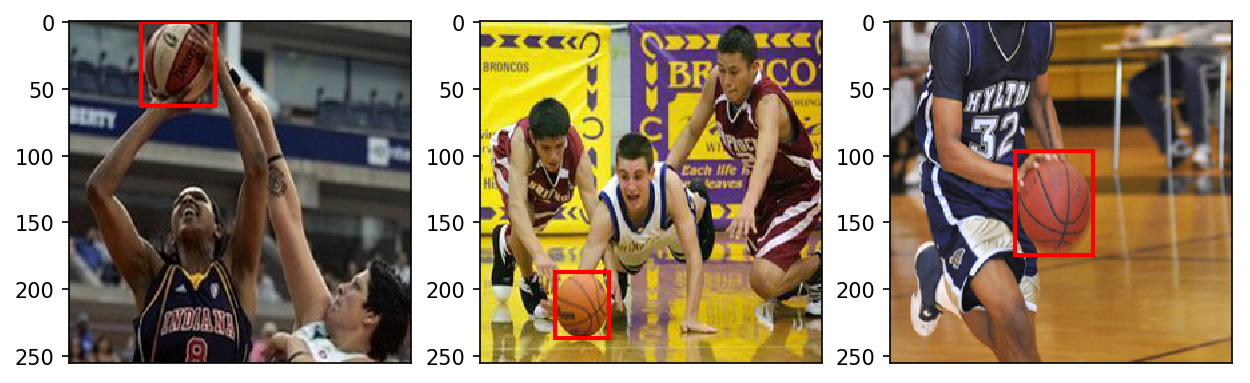

In [32]:
_, figs = plt.subplots(1, 3, figsize=(10,10))
for i in range(3):
    img, labels=batch.data[0][i],batch.label[0][i]
    img = img.transpose((1, 2, 0))
    img = img.asnumpy().astype(np.uint8)
    #img = img.clip(0,255).asnumpy()/255
    fig = figs[i]
    fig.imshow(img)
    for label in labels:
        rect = box_to_rect(label[1:5]*data_shape,'red',2)
        fig.add_patch(rect)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_xaxis().set_visible(False)
plt.show()